In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('emp_health.csv')
data

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


# a. Reading some rows of dataset

In [3]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


# 

# b. Learn data types of all features

In [4]:
data.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

# 

# c. See the statistical properties of the data.

In [5]:
data.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 

# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [6]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [7]:
data[(data['age']>50) | (data['smoke']=='yes')]['age'].count()

566

There are 64 employees above 50 age who smokes.

In [8]:
data[(data['age']>50) & (data['smoke']=='yes')]['expenditure'].mean()


38820.22308234375

There are 64 employees above 50 age who smokes and their average expenditure on health management is 38820.22308234375

# 

#  2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [9]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [10]:
data[(data['sex']=='female') & (data['alcohol']!='daily')]['sex'].count()

453

There are 453 female employees did not consume alcohol daily.

# 

In [11]:
data[data['sex']=='female']['sex'].count()

662

There are 662 total female employees. 

# 

In [12]:
data[(data['sex']=='female') & (data['alcohol']!='daily')]['sex'].count() / data[data['sex']=='female']['sex'].count()

0.6842900302114804

There are 662 total female employees from them 453 employees did not consume alcohol daily.
And their ratio is 0.6842900302114804

# 

# 3. Display zone wise average expenditure of employees on health

In [13]:
data.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [14]:
data.groupby('zone')[['expenditure']].mean().reset_index()

,zone,expenditure
0,east,13774.679941
1,north,14102.583403
2,northeast,13694.721724
3,northwest,12151.702619
4,south,14715.689519
5,southeast,14452.949680
6,southwest,12717.083869
7,west,12182.998872


In the above data frame we have shown average expenditure zonewise.

# 

# 4. Employees of which zone did maximum expenditure on health

In [15]:
data.head(3)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620


In [16]:
a=data.groupby('zone')[['expenditure']].mean().reset_index()
a.max()[['zone']]

zone    west
dtype: object

maximum expenditure on health done by west zone empoyee. 

# 

# 5. What is the minimum expenditure done by any employee in organization

In [17]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [18]:
data.sort_values('expenditure',ascending=True)[['expenditure']].head(1)

,expenditure
940,1121.8739


In [19]:
data[['expenditure']].min()

expenditure    1121.8739
dtype: float64

 The minimum expenditure done by any employee in organization is 1121.8739

# 

# 6. What is average expenditure of employees who have 2 or lesser dependents

In [20]:
data.head(3)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620


In [21]:
data[data['dependent']<=2]['expenditure'].mean()

13040.970970948145

The average expenditure of employees who have 2 or lesser dependents is 13040.970970948145

# 

# 7. How many employees are below age of 20 years. What is their average BMI

In [22]:
data.head(3)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620


In [23]:
data[data['age']<20]['age'].count()

137

There are 137 employees below age 20.

# 

In [24]:
data[data['age']<20]['bmi'].mean()

29.971496350364966

There are 137 employees below age 20 and their average BMI is 29.971496350364966

# 

# 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [25]:
data.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [26]:
non_smoker=pd.DataFrame(data[(data['sex']=='male') & (data['smoke']=='no')])
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


Dataframe "non_smoker" for all non-smoker male employees.

# 

# 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [27]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [28]:
data['alcohol'].unique()

array(['daily', 'weekend', 'rarely', 'party', 'no'], dtype=object)

In [29]:
non_alcoholic=pd.DataFrame(data[(data['sex']=='male') & (data['alcohol']=='no')])

In [30]:
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


Dataframe "non_alcoholic" for all male employees who do not consume alcohol.

# 

# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [31]:
df_10=pd.concat([non_smoker,non_alcoholic],axis=0)
df_10

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [32]:
non_smoking_alcoholic=df_10[(df_10['smoke']=='no') & (df_10['alcohol']=='no')]
non_smoking_alcoholic[['id','alcohol','smoke']]

,id,alcohol,smoke
18,i10030,no,no
24,i10036,no,no
28,i10040,no,no
37,i10049,no,no
67,i10079,no,no
...,...,...,...
1261,i11273,no,no
1270,i11282,no,no
1310,i11322,no,no
1320,i11332,no,no


A dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol with columns id, smoke, alcohol

# 

# 11.What is the count for each zone with respect to number of dependent

In [33]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [34]:
pd.crosstab(data['zone'],data['dependent'])

dependent,0,1,2,3,4,5
zone,,,,,,
east,124,65,42,22,6,3
north,26,20,10,12,1,1
northeast,35,9,15,13,2,0
northwest,70,28,30,13,4,0
south,38,21,12,12,1,0
southeast,81,57,38,15,2,5
southwest,116,53,44,25,6,7
west,84,71,49,45,3,2


The count for each zone with respect to number of dependent as per above data frame.

# 

# 12. Classify the employees into 3 categories.


Category 1 : employees below 18.5 bmi - underweight
 
Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit

Category 3 : employee with bmi over 24.9 - overweight

What is the average expenditure of employees in each category.
 

In [35]:
data.head(3)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620


In [36]:
Category1=pd.Series(data[data['bmi']<18.5]['bmi'],name='underweight')
Category1=pd.DataFrame(Category1)
Category1

,underweight
28,17.385
128,17.765
172,15.960
198,18.050
232,17.800
250,17.290
380,17.955
410,17.480
412,17.195
428,16.815


In [37]:
Category2=pd.Series(data[(data['bmi']>=18.5) & (data['bmi']<=24.9)]['bmi'],name='fit')
Category2=pd.DataFrame(Category2)
Category2

,fit
3,22.705
15,24.600
17,23.845
26,23.085
35,20.425
...,...
1304,24.605
1306,21.850
1314,23.655
1316,20.600


In [38]:
Category3=pd.Series(data[data['bmi']>24.9]['bmi'],name='overweight')
Category3=pd.DataFrame(Category3)
Category3

,overweight
0,27.90
1,33.77
2,33.00
4,28.88
5,25.74
...,...
1333,30.97
1334,31.92
1335,36.85
1336,25.80


In [39]:
data[data['bmi']<18.5]['expenditure'].mean()

8852.200585000002

The average expenditure for Category 1 is 8852.200585000002

In [40]:
data[(data['bmi']>=18.5) & (data['bmi']<=24.9)]['expenditure'].mean()

10379.499732162163

The average expenditure for Category 2 is 10379.499732162163

In [41]:
data[data['bmi']>24.9]['expenditure'].mean()

13936.616823466235

The average expenditure for Category 3 is 13936.616823466235

# 

# 13. Draw line plot of expenditure against age and BMI

In [42]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='expenditure'>

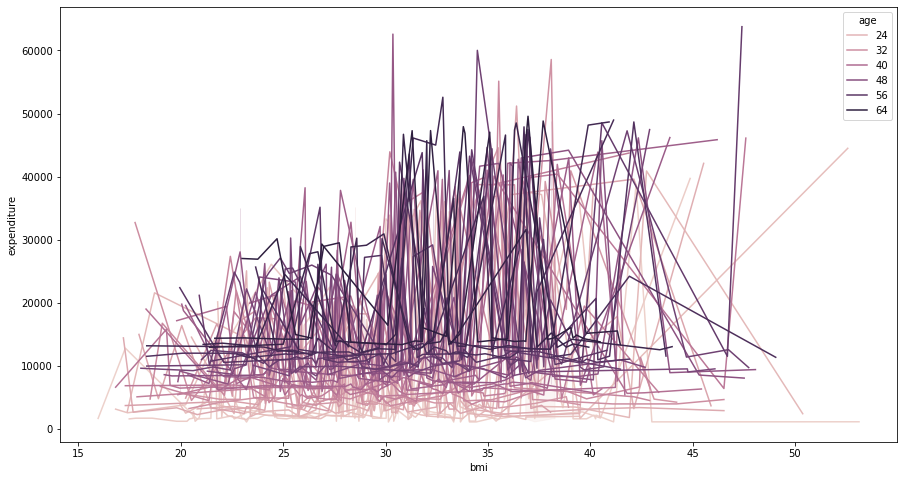

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(y='expenditure',x='bmi',data=data,hue='age')

<AxesSubplot:xlabel='age', ylabel='expenditure'>

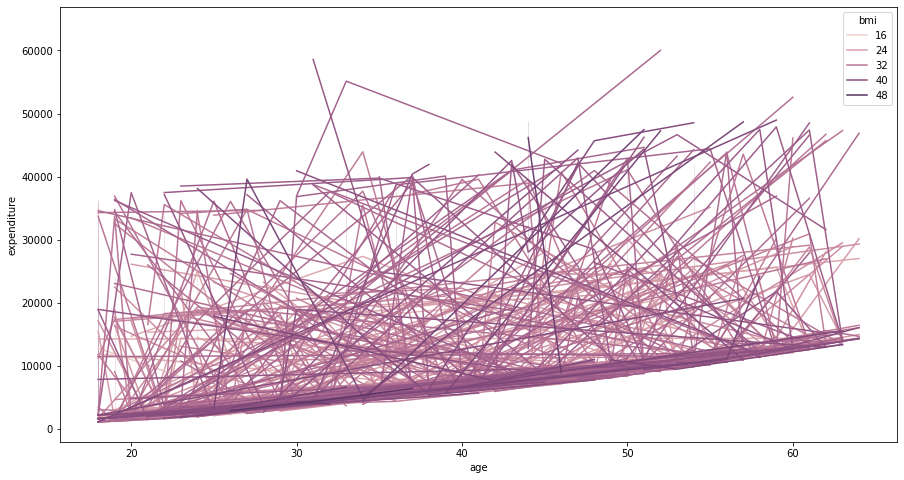

In [44]:
plt.figure(figsize=(15,8))
sns.lineplot(y='expenditure',x='age',data=data,hue='bmi')

Line plot of expenditure against age and BMI

# 

# 14. Draw a bar chart to show zone wise average expenditure

In [45]:
data.head(3)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620


In [46]:
x=pd.pivot_table(data,index=['zone'],values=['expenditure'],aggfunc=np.mean).reset_index()
x

,zone,expenditure
0,east,13774.679941
1,north,14102.583403
2,northeast,13694.721724
3,northwest,12151.702619
4,south,14715.689519
5,southeast,14452.949680
6,southwest,12717.083869
7,west,12182.998872


<AxesSubplot:xlabel='zone', ylabel='expenditure'>

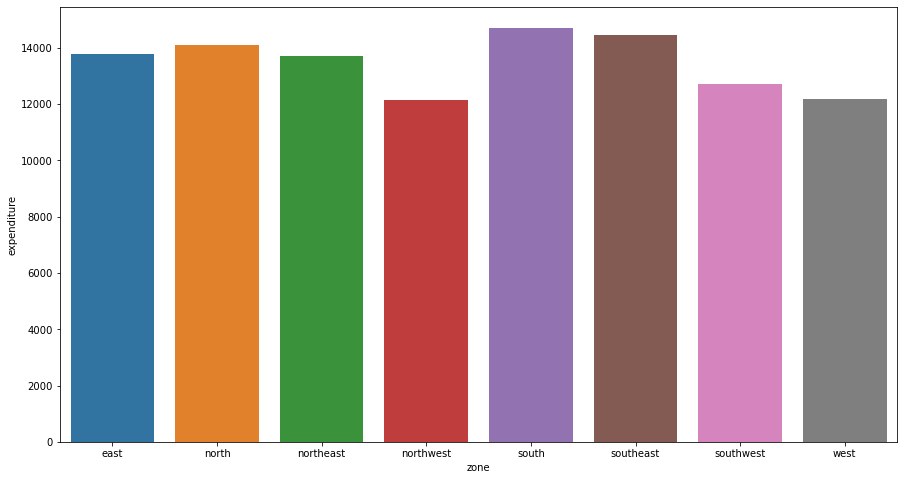

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(data=x,x='zone',y='expenditure')

Bar chart showing zone wise average expenditure.

# 

# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

<AxesSubplot:xlabel='alcohol', ylabel='expenditure'>

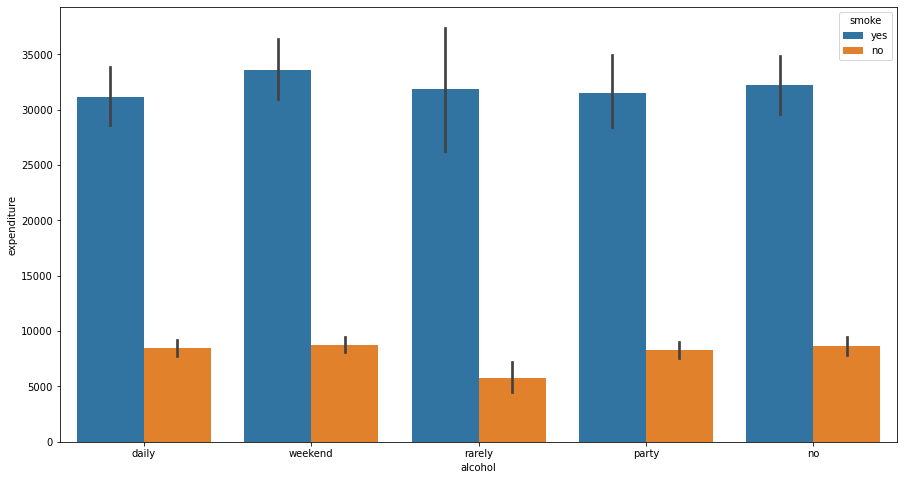

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,x='alcohol',y='expenditure',hue='smoke')

Bar chart to show smoking and alcoholic habits against average expenditure

# 

# 16. Draw pie chart for alcohol consumption habits

In [49]:
data['alcohol'].unique()

array(['daily', 'weekend', 'rarely', 'party', 'no'], dtype=object)

([<matplotlib.patches.Wedge at 0x2c0491a5070>,
 [Text(0.6598631335250115, 0.8801026332278259, 'daily'),
  Text(-0.9797551770757736, 0.5000797866273137, 'weekend'),
  Text(-0.5984529219141539, -0.9229594250303812, 'rarely'),
  Text(0.6964591150961473, -0.8514368449858696, 'party'),
  Text(1.089461966245801, -0.15189675475082812, 'no')],
 [Text(0.35992534555909717, 0.48005598176063224, '29.52%'),
  Text(-0.5344119147686037, 0.2727707927058074, '25.93%'),
  Text(-0.3264288664986294, -0.5034324136529351, '20.78%'),
  Text(0.37988679005244397, -0.4644200972650197, '19.36%'),
  Text(0.5942519815886187, -0.08285277531863351, '4.41%')])

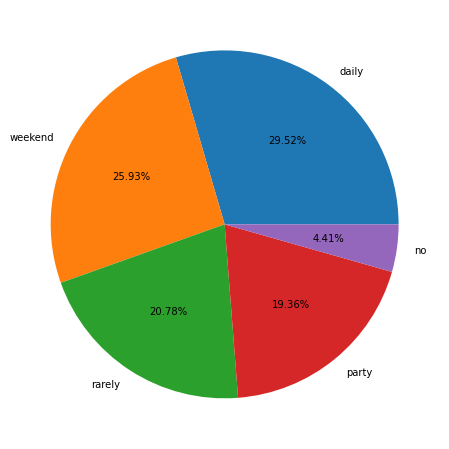

In [50]:
plt.figure(figsize=(15,8))
plt.pie(data.alcohol.value_counts(),labels=['daily','weekend','rarely','party','no'],autopct='%0.2f%%')

pie chart for alcohol consumption habits

# 

# 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

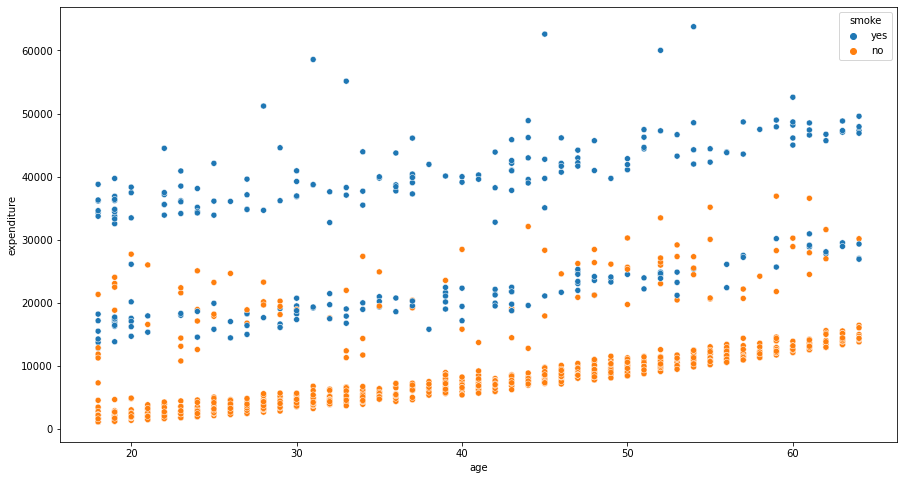

In [51]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='age',y='expenditure',hue='smoke')

Scatterplot to see the relation between age, expenditure and smoking habits.

# 

# 18. Draw distribution plot of expenditure

<AxesSubplot:xlabel='expenditure', ylabel='Density'>

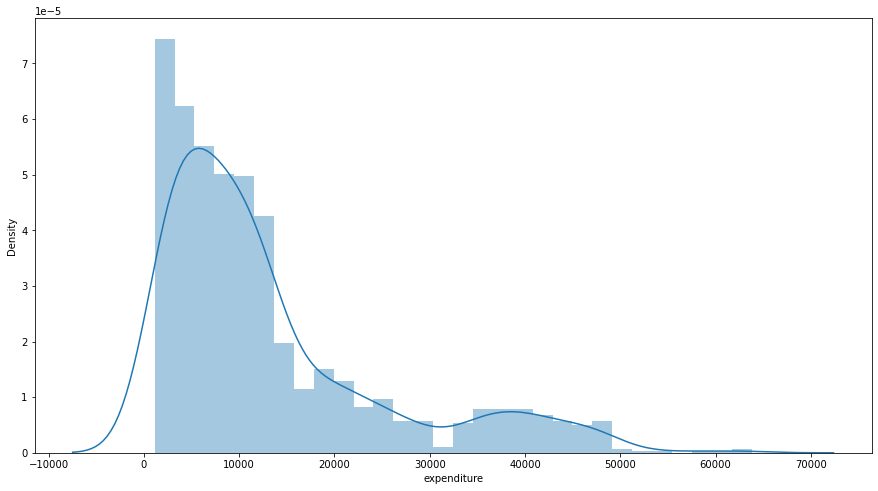

In [52]:
plt.figure(figsize=(15,8))
sns.distplot(data['expenditure'],kde=True)

Distribution plot of expenditure.

# 

# 19. Display the pairplot

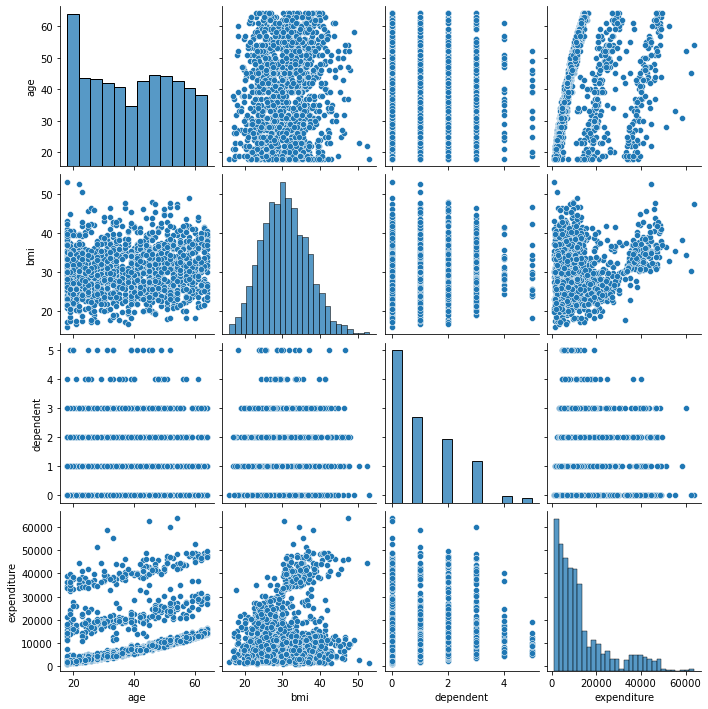

In [53]:
sns.pairplot(data)

Pairplot for the data.

# 

# 20. Display heatmap for the data

<AxesSubplot:>

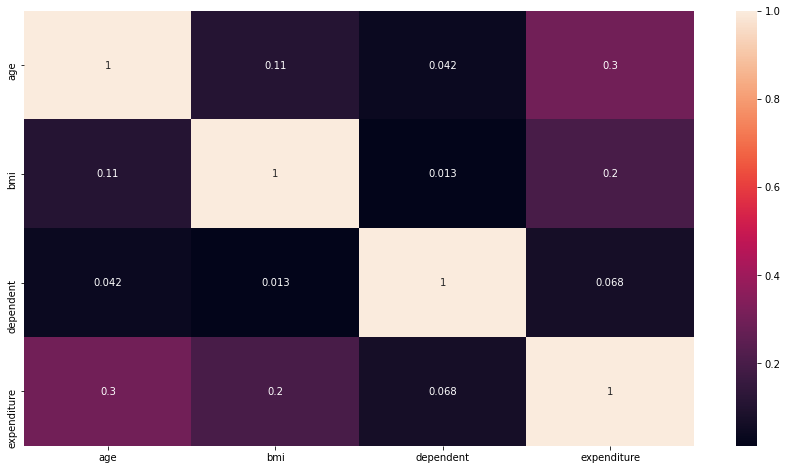

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

Heatmap for the data

# 

                                     🙂   The End   🙂

# 